In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc4


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
data = pd.read_csv ('/content/Relinput.csv')
temp=pd.DataFrame(data, columns= ['Open','High','Low','Close','Adj Close','Volume']).dropna()
ON=np.array(temp.iloc[1:len(temp),0])
res=np.array(temp.iloc[11:len(temp),3])
temp.drop(temp.index[len(temp)-1], inplace=True)
temp.drop(columns=['Open'], inplace=True)
temp['ON']=ON
a1=np.array(temp.iloc[9:len(temp)-1])
a2=np.array(temp.iloc[8:len(temp)-2])
a3=np.array(temp.iloc[7:len(temp)-3])
a4=np.array(temp.iloc[6:len(temp)-4])
a5=np.array(temp.iloc[5:len(temp)-5])
a6=np.array(temp.iloc[4:len(temp)-6])
a7=np.array(temp.iloc[3:len(temp)-7])
a8=np.array(temp.iloc[2:len(temp)-8])
a9=np.array(temp.iloc[1:len(temp)-9])
a10=np.array(temp.iloc[0:len(temp)-10])
temp.drop(temp.index[0:10], inplace=True)

In [50]:
temp['O1'], temp['H1'], temp['L1'],temp['C1'], temp['AC1'], temp['V1'],temp['O2'], temp['H2'], temp['L2'],temp['C2'], temp['AC2'], temp['V2'],temp['O3'], temp['H3'], temp['L3'],temp['C3'], temp['AC3'], temp['V3'] = [a1[:,0],a1[:,1],a1[:,2],a1[:,3],a1[:,4],a1[:,5], a2[:,0],a2[:,1],a2[:,2],a2[:,3],a2[:,4],a2[:,5], a3[:,0],a3[:,1],a3[:,2],a3[:,3],a3[:,4],a3[:,5]]
temp['O4'], temp['H4'], temp['L4'],temp['C4'], temp['AC4'], temp['V4'],temp['O5'], temp['H5'], temp['L5'],temp['C5'], temp['AC5'], temp['V5'],temp['O6'], temp['H6'], temp['L6'],temp['C6'], temp['AC6'], temp['V6'] = [a4[:,0],a4[:,1],a4[:,2],a4[:,3],a4[:,4],a4[:,5], a5[:,0],a5[:,1],a5[:,2],a5[:,3],a5[:,4],a5[:,5], a6[:,0],a6[:,1],a6[:,2],a6[:,3],a6[:,4],a6[:,5]]
temp['O7'], temp['H7'], temp['L7'],temp['C7'], temp['AC7'], temp['V7'],temp['O8'], temp['H8'], temp['L8'],temp['C8'], temp['AC8'], temp['V8'],temp['O9'], temp['H9'], temp['L9'],temp['C9'], temp['AC9'], temp['V9'] = [a7[:,0],a7[:,1],a7[:,2],a7[:,3],a7[:,4],a7[:,5], a8[:,0],a8[:,1],a8[:,2],a8[:,3],a8[:,4],a8[:,5], a9[:,0],a9[:,1],a9[:,2],a9[:,3],a9[:,4],a9[:,5]]
temp['O10'], temp['H10'], temp['L10'],temp['C10'], temp['AC10'], temp['V10'], temp['result']=[a10[:,0],a10[:,1],a10[:,2],a10[:,3],a10[:,4],a10[:,5],res]
temp

,High,Low,Close,Adj Close,Volume,ON,O1,H1,L1,C1,AC1,V1,O2,H2,L2,C2,AC2,V2,O3,H3,L3,C3,AC3,V3,O4,H4,L4,C4,AC4,V4,O5,H5,L5,C5,AC5,V5,O6,H6,L6,C6,AC6,V6,O7,H7,L7,C7,AC7,V7,O8,H8,L8,C8,AC8,V8,O9,H9,L9,C9,AC9,V9,O10,H10,L10,C10,AC10,V10,result
10,49.942600,47.966801,48.435398,21.883698,34462249.0,48.107399,51.293701,49.396000,49.802101,22.501196,49954718.0,49.669300,50.278500,49.200699,49.575600,22.398855,20061566.0,50.122299,50.715801,47.873100,49.903599,22.547052,37116648.0,49.981701,50.372200,48.935200,49.341301,22.292999,26475908.0,48.740002,50.614300,49.044498,49.474098,22.352995,41160445.0,49.919201,52.308998,50.497101,50.801701,22.952822,42592323.0,50.614300,51.832600,49.731800,51.285900,23.171593,39288893.0,51.543598,52.637001,50.340900,50.606499,22.864630,37718360.0,50.216000,53.347599,51.246899,52.379200,23.665560,71351697.0,51.699799,53.566299,51.699799,52.668201,23.796133,72521150.0,52.871300,49.294399
11,49.833302,47.990200,49.294399,22.271807,51008320.0,48.888302,49.942600,47.966801,48.435398,21.883698,34462249.0,48.107399,51.293701,49.396000,49.802101,22.501196,49954718.0,49.669300,50.278500,49.200699,49.575600,22.398855,20061566.0,50.122299,50.715801,47.873100,49.903599,22.547052,37116648.0,49.981701,50.372200,48.935200,49.341301,22.292999,26475908.0,48.740002,50.614300,49.044498,49.474098,22.352995,41160445.0,49.919201,52.308998,50.497101,50.801701,22.952822,42592323.0,50.614300,51.832600,49.731800,51.285900,23.171593,39288893.0,51.543598,52.637001,50.340900,50.606499,22.864630,37718360.0,50.216000,53.347599,51.246899,52.379200,23.665560,71351697.0,51.699799,48.802399
12,49.497501,48.263599,48.802399,22.049517,19960902.0,48.778999,49.833302,47.990200,49.294399,22.271807,51008320.0,48.888302,49.942600,47.966801,48.435398,21.883698,34462249.0,48.107399,51.293701,49.396000,49.802101,22.501196,49954718.0,49.669300,50.278500,49.200699,49.575600,22.398855,20061566.0,50.122299,50.715801,47.873100,49.903599,22.547052,37116648.0,49.981701,50.372200,48.935200,49.341301,22.292999,26475908.0,48.740002,50.614300,49.044498,49.474098,22.352995,41160445.0,49.919201,52.308998,50.497101,50.801701,22.952822,42592323.0,50.614300,51.832600,49.731800,51.285900,23.171593,39288893.0,51.543598,52.637001,50.340900,50.606499,22.864630,37718360.0,50.216000,49.161701
13,49.356899,48.185501,49.161701,22.211853,26693875.0,48.989899,49.497501,48.263599,48.802399,22.049517,19960902.0,48.778999,49.833302,47.990200,49.294399,22.271807,51008320.0,48.888302,49.942600,47.966801,48.435398,21.883698,34462249.0,48.107399,51.293701,49.396000,49.802101,22.501196,49954718.0,49.669300,50.278500,49.200699,49.575600,22.398855,20061566.0,50.122299,50.715801,47.873100,49.903599,22.547052,37116648.0,49.981701,50.372200,48.935200,49.341301,22.292999,26475908.0,48.740002,50.614300,49.044498,49.474098,22.352995,41160445.0,49.919201,52.308998,50.497101,50.801701,22.952822,42592323.0,50.614300,51.832600,49.731800,51.285900,23.171593,39288893.0,51.543598,48.849300
14,49.653702,48.419800,48.849300,22.070707,25878070.0,48.778999,49.356899,48.185501,49.161701,22.211853,26693875.0,48.989899,49.497501,48.263599,48.802399,22.049517,19960902.0,48.778999,49.833302,47.990200,49.294399,22.271807,51008320.0,48.888302,49.942600,47.966801,48.435398,21.883698,34462249.0,48.107399,51.293701,49.396000,49.802101,22.501196,49954718.0,49.669300,50.278500,49.200699,49.575600,22.398855,20061566.0,50.122299,50.715801,47.873100,49.903599,22.547052,37116648.0,49.981701,50.372200,48.935200,49.341301,22.292999,26475908.0,48.740002,50.614300,49.044498,49.474098,22.352995,41160445.0,49.919201,52.308998,50.497101,50.801701,22.952822,42592323.0,50.614300,48.857101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,1294.000000,1259.000000,1266.800049,1266.800049,8778739.0,1285.0

In [0]:
train_dataset = temp.sample(frac=0.9,random_state=0)
test_dataset = temp.drop(train_dataset.index)

In [53]:
train_stats = train_dataset.describe()
train_stats.pop("result")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
High,4292.0,4.153813e+02,3.118909e+02,35.080898,8.963510e+01,4.308500e+02,5.270125e+02,1.417500e+03
Low,4292.0,4.045756e+02,3.048517e+02,31.800800,8.670455e+01,4.210875e+02,5.136437e+02,1.402650e+03
Close,4292.0,4.098040e+02,3.082886e+02,32.269402,8.788190e+01,4.257000e+02,5.199625e+02,1.408850e+03
Adj Close,4292.0,3.693975e+02,3.097750e+02,15.776643,5.853170e+01,3.786686e+02,4.665635e+02,1.401091e+03
Volume,4292.0,1.683231e+07,1.694553e+07,0.000000,6.485922e+06,1.057777e+07,2.149087e+07,2.890615e+08
...,...,...,...,...,...,...,...,...
H10,4292.0,4.020806e+02,3.027993e+02,31.800800,8.616372e+01,4.201625e+02,5.120500e+02,1.402650e+03
L10,4292.0,4.073040e+02,3.062609e+02,32.269402,8.739572e+01,4.246565e+02,5.186250e+02,1.408850e+03
C10,4292.0,3.668285e+02,3.074752e+02,15.776643,5.841441e+01,3.771807e+02,4.661521e+02,1.401091e+03
AC10,4292.0,1.693023e+07,1.693124e+07,0.000000,6.497888e+06,1.057410e+07,2.154021e+07,2.890615e+08


In [0]:
train_labels = train_dataset.pop('result')
test_labels = test_dataset.pop('result')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(150, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [60]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 150)               10050     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[1.2848344 ],
       [1.2140508 ],
       [0.35816061],
       [0.0456237 ],
       [0.09147629],
       [1.8793124 ],
       [0.48145148],
       [0.25099057],
       [0.20076564],
       [0.07726903]], dtype=float32)

In [62]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:121335.6016,  mae:268.6448,  mse:121335.6016,  val_loss:37418.3750,  val_mae:165.3720,  val_mse:37418.3750,  
....................................................................................................
Epoch: 100, loss:247.3187,  mae:10.0133,  mse:247.3187,  val_loss:165.8379,  val_mae:8.4507,  val_mse:165.8379,  
....................................................................................................
Epoch: 200, loss:195.1600,  mae:9.0954,  mse:195.1600,  val_loss:772.6571,  val_mae:19.2860,  val_mse:772.6571,  
....................................................................................................
Epoch: 300, loss:160.8269,  mae:8.3783,  mse:160.8269,  val_loss:99.4820,  val_mae:6.8751,  val_mse:99.4820,  
....................................................................................................
Epoch: 400, loss:144.2234,  mae:7.8646,  mse:144.2234,  val_loss:154.6191,  val_mae:8.8528,  val_mse:154.6191,  
..................

In [63]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,97.510971,6.281053,97.510971,237.337280,10.353321,237.337280,995
996,95.666580,6.210209,95.666580,322.889160,12.391212,322.889160,996
997,90.013153,6.261098,90.013153,194.471176,10.594497,194.471176,997
998,95.054169,6.357537,95.054169,121.671036,7.930238,121.671036,998
999,96.304848,6.129879,96.304848,112.504562,7.200643,112.504562,999


Text(0, 0.5, 'Loss [High]')

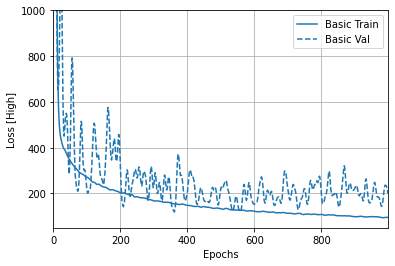

In [66]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([50, 1000])
plt.ylabel('Loss [High]')

Text(0, 0.5, 'MSE [High^2]')

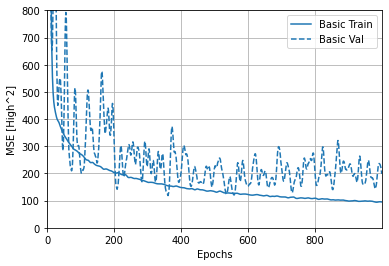

In [67]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 800])
plt.ylabel('MSE [High^2]')

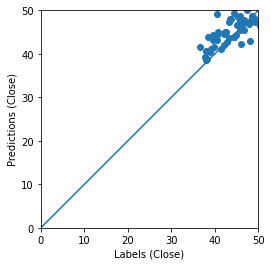

In [103]:
test_dataset['Pred'] = model.predict(normed_test_data).flatten()
test_dataset['labels']=test_labels

a = plt.axes(aspect='equal')
plt.scatter(test_dataset['labels'], test_dataset['Pred'])
plt.xlabel('Labels (Close)')
plt.ylabel('Predictions (Close)')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

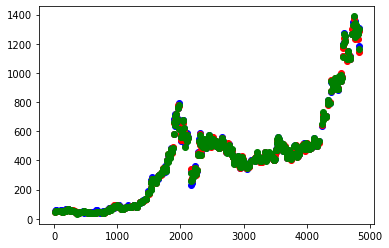

In [105]:
plt.scatter(test_dataset.index,test_dataset.Pred, color="blue")
plt.scatter(test_dataset.index,test_dataset.labels, color="red")
plt.scatter(test_dataset.index,test_dataset.ON, color="green")
#new=test_dataset.index+1
#lims = [500, 550]
#plt.ylim(lims)

In [0]:
test_dataset['Long'] = np.where(((test_dataset['labels']>=test_dataset['Pred']) & (test_dataset['Pred']>= test_dataset['ON'])) 
                     , 1, np.nan)

In [0]:
test_dataset['Short'] = np.where(((test_dataset['labels']<=test_dataset['Pred']) & (test_dataset['Pred']<= test_dataset['ON'])) 
                     , 1, np.nan)

In [145]:
Accuracy=(test_dataset[test_dataset.Short==1].shape[0]+test_dataset[test_dataset.Long==1].shape[0])/len(test_dataset)
Accuracy

0.24737945492662475